In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 8.1 MB/s eta 0:00:00


1. Rotate the following grayscale image by 45° using rotation matrix. Interpolate
the rotated image to compute the grayscales of the pixels, for which the
grayscales are not defined in the rotated image. (Do not use the inbuilt
functions to rotate and interpolate the image. Create your own bilinear
interpolation function to interpolate the image. The image is available in
MATLAB with the name cameraman.tif).

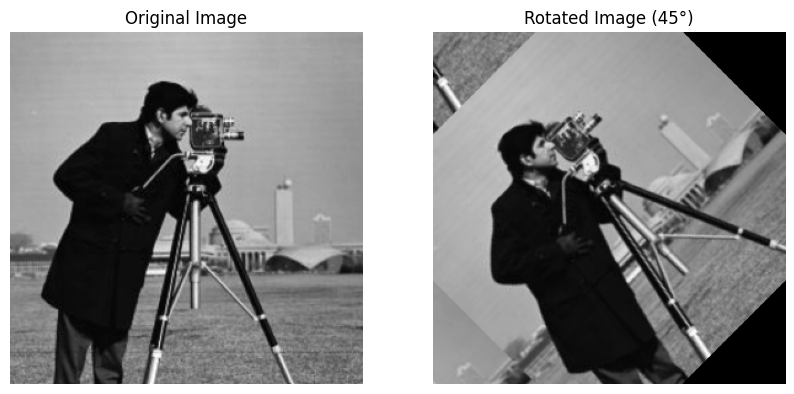

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the cameraman.tif image
image_path = "/content/cameraman.tif.png"  # Replace with the correct path to your image
image = io.imread(image_path, as_gray=True)

# Define the rotation angle in degrees
angle = 45
theta = np.deg2rad(angle)

# Create the rotation matrix
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

# Get the center of the image
center_x, center_y = image.shape[1] // 2, image.shape[0] // 2

# Initialize the rotated image
rotated_image = np.zeros_like(image)

# Function for bilinear interpolation
def bilinear_interpolation(image, x, y):
    x0, y0 = int(np.floor(x)), int(np.floor(y))
    x1, y1 = x0 + 1, y0 + 1

    dx, dy = x - x0, y - y0

    if x0 >= image.shape[1] - 1 or y0 >= image.shape[0] - 1:
        return 0  # Return 0 for out-of-bounds pixels

    interpolated_value = (1 - dx) * (1 - dy) * image[y0, x0] + dx * (1 - dy) * image[y0, x1] + (1 - dx) * dy * image[y1, x0] + dx * dy * image[y1, x1]
    return interpolated_value

# Iterate over each pixel in the rotated image
for y in range(rotated_image.shape[0]):
    for x in range(rotated_image.shape[1]):
        # Calculate the original coordinates of the pixel in the rotated image
        original_x, original_y = np.dot(rotation_matrix, np.array([x - center_x, y - center_y])) + np.array([center_x, center_y])

        # Perform bilinear interpolation
        rotated_image[y, x] = bilinear_interpolation(image, original_x, original_y)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image (45°)")
plt.axis('off')

plt.show()


2. Compute the equalized histogram of the image shown in Fig.1. Transform
the image using the equalized histogram. (Do not use the inbuilt functions to
compute the equalized histogram. Implement the transformation logic
without using inbuilt functions).

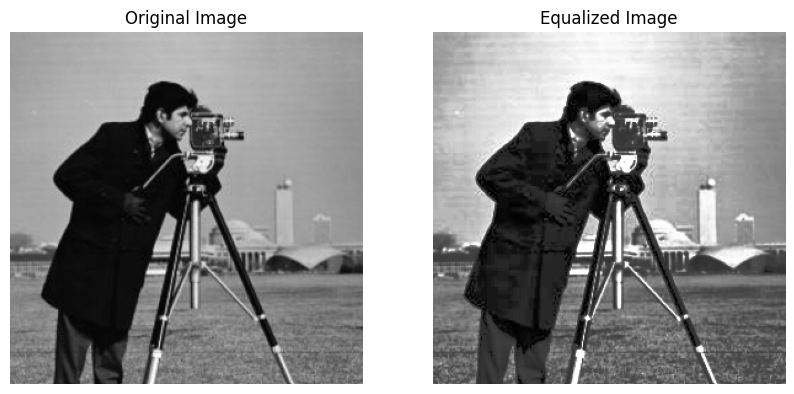

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/cameraman.tif.png', cv2.IMREAD_GRAYSCALE)

# Step 1: Compute the histogram of the image
histogram, _ = np.histogram(image.flatten(), bins=256, range=[0,256])

# Step 2: Compute the cumulative distribution function (CDF) of the histogram
cdf = histogram.cumsum()

# Step 3: Normalize the CDF to obtain the equalized histogram
cdf_normalized = cdf / float(cdf.max())

# Step 4: Transform the image using the equalized histogram
equalized_image = np.interp(image.flatten(), range(256), cdf_normalized * 255)
equalized_image = equalized_image.reshape(image.shape).astype(np.uint8)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()


3. Convolve the image shown in Fig.1, with Sobel, and Prewitt kernels defined
in x and y directions using convolution technique discussed in the class. Show
the resulting images. (Do not use conv or any other inbuilt functions to
convolve the image).

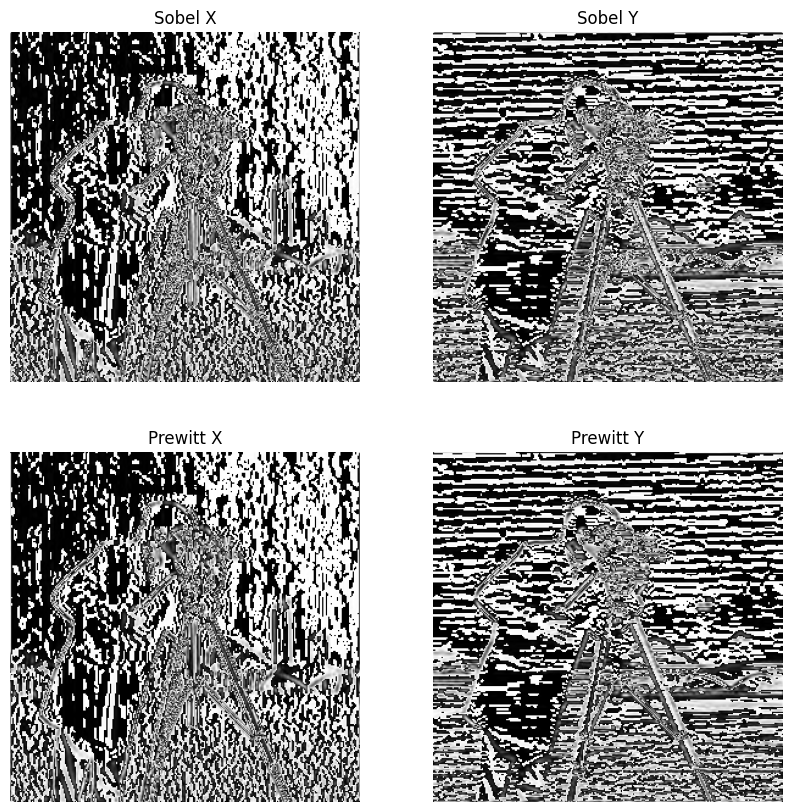

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/cameraman.tif.png', cv2.IMREAD_GRAYSCALE)

# Define Sobel and Prewitt kernels for x and y directions
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Define convolution function
def convolution(image, kernel):
    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Get padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Create zero padded image
    padded_image = np.zeros((image_height + 2 * pad_height, image_width + 2 * pad_width))
    padded_image[pad_height:-pad_height, pad_width:-pad_width] = image

    # Perform convolution
    convolved_image = np.zeros_like(image)
    for i in range(image_height):
        for j in range(image_width):
            convolved_image[i, j] = np.sum(kernel * padded_image[i:i+kernel_height, j:j+kernel_width])

    return convolved_image

# Perform convolution with Sobel kernels
sobel_x = convolution(image, sobel_kernel_x)
sobel_y = convolution(image, sobel_kernel_y)

# Perform convolution with Prewitt kernels
prewitt_x = convolution(image, prewitt_kernel_x)
prewitt_y = convolution(image, prewitt_kernel_y)

# Display the resulting images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(prewitt_x, cmap='gray')
plt.title('Prewitt X')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(prewitt_y, cmap='gray')
plt.title('Prewitt Y')
plt.axis('off')

plt.show()
